# Sensitivity Tests Output

Working with the output from HiPerGator/main.py

In [220]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import os
from tqdm import tqdm

from pathlib import Path

import photoeccentric as ph


plt.rcParams['figure.dpi'] = 150

In [221]:
trueew_uniform = pd.read_csv('/Users/ssagear/Dropbox (UFL)/Research/MetallicityProject/photoeccentric/notebooks/plots_hpg/uniform/fitew.txt', index_col=False)

distpath_uniform = "/Users/ssagear/Dropbox (UFL)/Research/MetallicityProject/photoeccentric/notebooks/plots_hpg/uniform/edists/"

truew = np.array(trueew_uniform['truew'])
truee = np.array(trueew_uniform['truee'])

In [222]:
paths = sorted(Path(distpath_uniform).iterdir(), key=os.path.getmtime)
paths.reverse()

edist_uniform = []

for file in paths:
    fname = os.path.join(distpath_uniform, file)
    try:
        edist_uniform.append(np.genfromtxt(fname, delimiter=','))
    except UnicodeDecodeError:
        pass

es_uniform = []
ws_uniform = []
gs_uniform = []

for i in range(len(edist_uniform)):

    es_uniform.append(edist_uniform[i][:,0])
    ws_uniform.append(edist_uniform[i][:,1])
    gs_uniform.append(edist_uniform[i][:,2])

In [223]:
fite = []
for i in range(len(es_uniform)):
    fite.append(ph.mode(es_uniform[i]))
fite = np.array(fite)

fitw = []
for i in range(len(ws_uniform)):
    fitw.append(ph.mode(ws_uniform[i]))
fitw = np.array(fitw)

In [224]:
e_errors = np.abs(truee-fite)

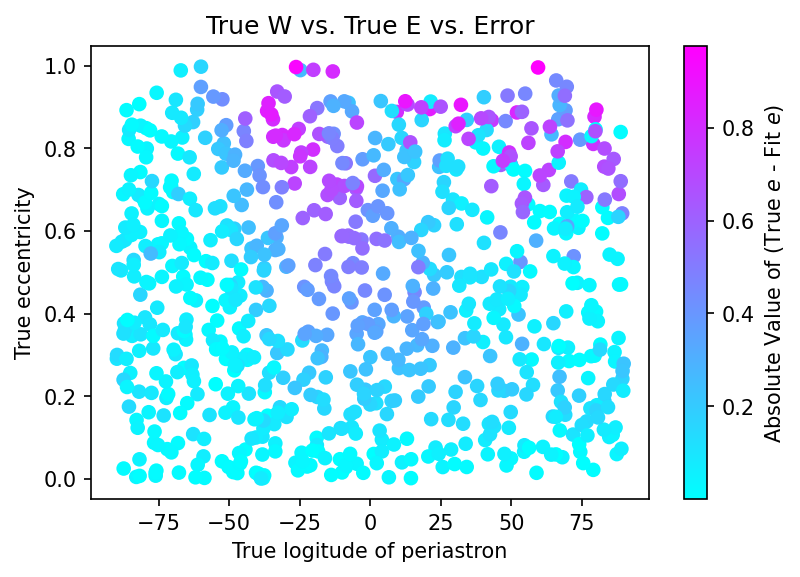

In [225]:
plt.scatter(truew, truee, c=e_errors, cmap='cool')
plt.ylabel('True eccentricity')
plt.xlabel('True logitude of periastron')
plt.title('True W vs. True E vs. Error')

plt.clim(min(abs(e_errors)), max(abs(e_errors)))
plt.colorbar(label='Absolute Value of (True $e$ - Fit $e$)')
plt.savefig('nodiv_scatter_eerror.png')

In [233]:
def deltallike(g, gerr, truee, truew, fite, fitw):
    
    model_fit = (1+e*np.sin(w*(np.pi/180.)))/np.sqrt(1-e**2)
    sigma2_fit = gerr ** 2
    loglike_fit = -0.5 * np.sum((g - model_fit) ** 2 / sigma2_fit + np.log(sigma2_fit))
    
    
    model_true = (1+truee*np.sin(truew*(np.pi/180.)))/np.sqrt(1-truee**2)
    sigma2_true = gerr ** 2
    loglike_true = -0.5 * np.sum((g - model_true) ** 2 / sigma2_true + np.log(sigma2_true))
    
    llike = np.abs(loglike_fit-loglike_true)
    return llike



llike = []

for i in range(len(truee)):

    g = ph.mode(gs_uniform[i])
    e = ph.mode(es_uniform[i])
    w = ph.mode(ws_uniform[i])
    
    gerr = np.nanstd(gs_uniform[i])
    
    llike.append(deltallike(g, gerr, truee[i], truew[i], e, w))
    
    
llike = np.array(llike)

In [234]:
like = np.e**llike

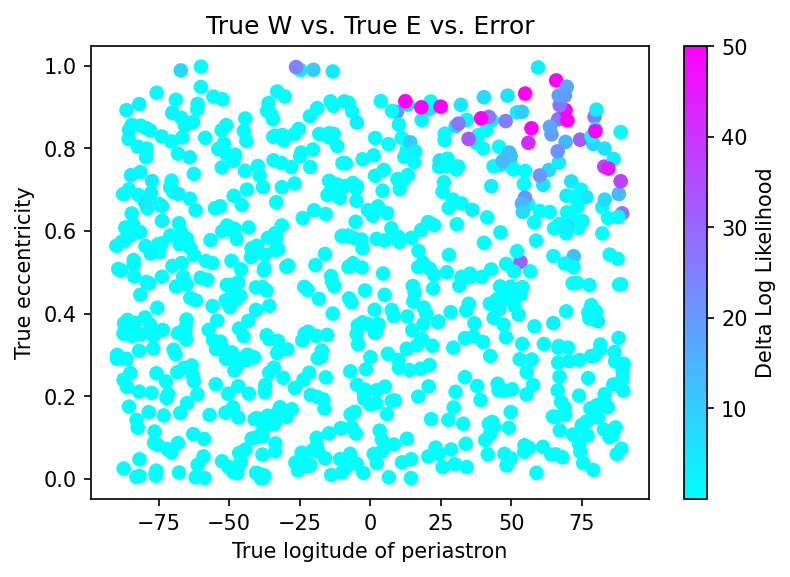

In [235]:
plt.scatter(truew, truee, c=llike, cmap='cool')
#plt.scatter(truew, truee, c=like, cmap='cool', norm=matplotlib.colors.LogNorm())
plt.clim(vmax=50)
plt.ylabel('True eccentricity')
plt.xlabel('True logitude of periastron')
plt.title('True W vs. True E vs. Error')

plt.colorbar(label='Delta Log Likelihood')
plt.savefig('nodiv_scatter_eerror)llike.png')

# Heatmap

100%|██████████| 776/776 [00:00<00:00, 15363.61it/s]
<ipython-input-177-2c31e71e5cf7>:142: RuntimeWarning: invalid value encountered in double_scalars
  counts.T[i][j] = counts.T[i][j]/counts_tot.T[i][j]


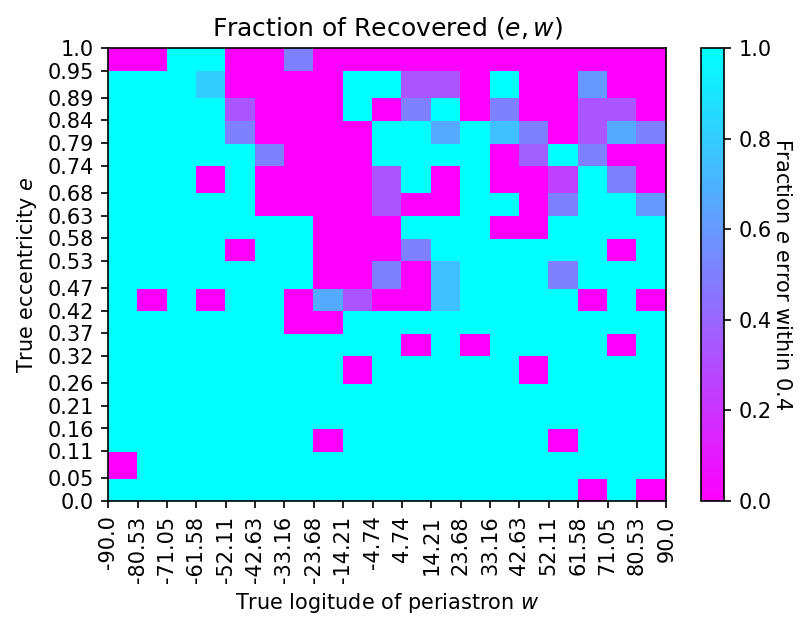

In [177]:
def heatmap_bins(e_min, e_max, nebins, w_min, w_max, nwbins, loge=False):
    """
    Gets bin edges for detection efficiency heatmap.
    
    Parameters
    ----------
    e_min: float
        Minimum e in sample
    period_max: float
        Maximum period in sample
    nperbins: int
        Number of period bins in heatmap
    rprs_min: float
        Minimum Rp/Rs in sample (or radius)
    rprs_max: float
        Maximum Rp/Rs in sample (or radius)
    nradbins: int
        Number of radius bins in heatmap
    logper: boolean, default True
        Log x (period)-axis?

    Returns
    -------
    per_segments: np.array
        Array of x-axis (period) bin edges
    rprs_segments: np.array
        Array of y-axis (radius) bin edges
    
    """

    if loge==True:

        natural_val = np.linspace(e_min, np.log10(e_max), num=nebins, endpoint=True).round(decimals=2)
        e_segments = np.array([10**x for x in natural_val]).round(decimals=2)
        
    if loge==False:
        
        e_segments = np.linspace(e_min, e_max, num=nebins, endpoint=True).round(decimals=2)

    
    w_segments = np.linspace(w_min, w_max, num=nwbins).round(decimals=2)
    
    return e_segments, w_segments


# Getting bin edges
e_segments, w_segments = heatmap_bins(0.0, 1.0, 20, -90., 90., 20, loge=False)

def is_recovered(error, e, fe, w, fw, e_segments, w_segments):#true (injected) period, L-M fitting period, true rp/rs, L-M fitting rp/rs
    
    """
    Determines whether a planet is recovered.
    
    ** Note **
    The first if-statement can be changed to reflect the conditions for planet recovery.
    
    ** Note **
    r_list, recovered_period, and recovered_rprs must be defined outside of this function (see cell below)
    
    
    Parameters
    ----------
    period: float
        True (known) period of simulated planet
    fitper: float
        Fit (recovered) period of simulated planet
    rprs: float
        True (known) Rp/Rs of simulated planet
    fitrprs: float
        Fit (recovered) Rp/Rs of simulated planet
    per_segments: np.array
        Period bin edges
    rprs_segments: np.array
        Radius bin edges
        
    Returns
    -------
    None
    
    
    """
    if error < 0.4:
    #You can define your own definition of "recovered" here.
    
        recovered = True
        
        recovered_es.append(e)
        recovered_ws.append(w)
        
        for e_i in range(len(e_segments)-1):
            for w_i in range(len(w_segments)-1):
                if e_segments[e_i] < e < e_segments[e_i+1]:
                    if w_segments[w_i] < w < w_segments[w_i+1]:
                        r_list[w_i][e_i] += 1
                        
    else:
        
        recovered = False


# Define lists to save for heatmap
r_list = np.zeros((len(e_segments), len(w_segments)))
recovered_es = []
recovered_ws = []


for i in tqdm(range(len(truee))):
    is_recovered(e_errors[i], truee[i], fite[i], truew[i], fitw[i], e_segments, w_segments)

def plot(recovered_es, recovered_ws, true_es, true_ws, filename='e_w_heatmap.png', xlog=False):
    
    """
    Plots + saves detection efficiency heatmap
    
    Parameters
    ----------
    recovered_period: np.array
        Array of "fit" es
    recovered_rprs: np.array
        Array of "fit" ws
    true_periods: np.array
        Array of true (simulated) periods
    true_rprs: np.array
        Array of true (simulated) radii
    filename: str, default 'heatmap.png'
        Directory + filename to save heatmap
    xlog: boolean, default True
        Log x-axis? Must match logper argument in heatmap_bins()
        
    Returns
    -------
    fig: matplotlib.figure.Figure object
        Heatmap
    
    """
    
    counts, _, _ = np.histogram2d(recovered_ws, recovered_es, bins=(w_segments, e_segments))
    counts_tot, _, _ = np.histogram2d(true_ws, true_es, bins=(w_segments, e_segments))

    for i in range(len(counts.T)):
        for j in range(len(counts.T[i])):
            counts.T[i][j] = counts.T[i][j]/counts_tot.T[i][j]
            if np.isnan(counts.T[i][j]):
                counts.T[i][j] = 0

    matplotlib.rcParams['xtick.minor.size'] = 0
    matplotlib.rcParams['xtick.minor.width'] = 0

    fig, ax = plt.subplots()
    heatmap = ax.pcolormesh(w_segments, e_segments, counts.T, cmap='cool_r')
    
    if xlog==True:
        ax.set_xscale('log')

    ax.xaxis.set_ticks(w_segments)
    ax.xaxis.set_ticklabels(w_segments, fontsize=10, rotation='vertical')

    ax.yaxis.set_ticks(e_segments)
    ax.yaxis.set_ticklabels(e_segments)

    ax.set_title('Fraction of Recovered $(e,w)$')
    ax.set_ylabel('True eccentricity $e$')
    ax.set_xlabel('True logitude of periastron $w$')


    cbar = plt.colorbar(heatmap)
    heatmap.set_clim(0.0, 1.0)
    cbar.set_label('Fraction $e$ error within 0.4', rotation=270, labelpad=10)


    plt.savefig(filename)
    plt.show()
    
    return fig


heatmap = plot(recovered_es, recovered_ws, truee, truew, xlog=False)


In [178]:
H, xedges, yedges = np.histogram2d(truew, truee, bins = [w_segments, e_segments], weights = llike)
H_counts, xedges, yedges = np.histogram2d(truew, truee, bins = [w_segments, e_segments]) 
H = H/H_counts

<ipython-input-178-0ae99cd2ff74>:3: RuntimeWarning: invalid value encountered in true_divide
  H = H/H_counts


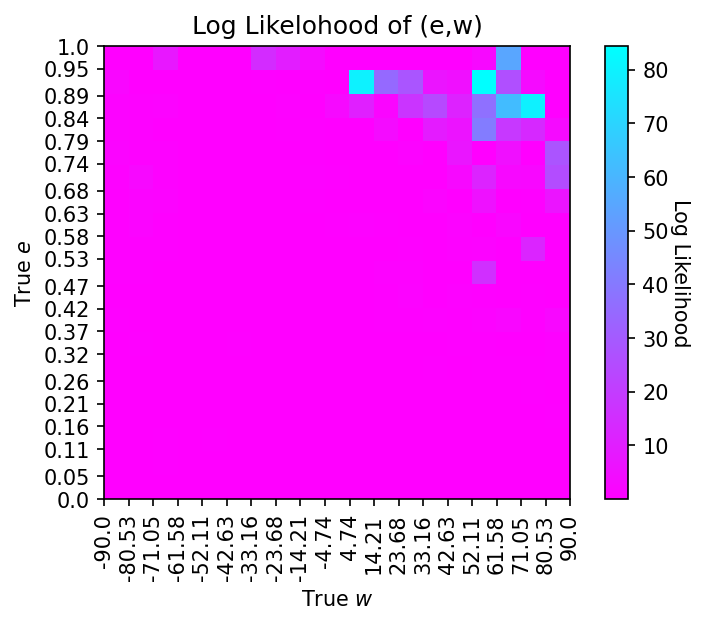

In [179]:
fig, ax = plt.subplots()
heatmap = ax.imshow(H.T, origin='lower',  cmap='cool_r', extent = [-90, 90, 0, 1], aspect=175)
#norm=matplotlib.colors.LogNorm()



ax.xaxis.set_ticks(w_segments)
ax.xaxis.set_ticklabels(w_segments, fontsize=10, rotation='vertical')

ax.yaxis.set_ticks(e_segments)
ax.yaxis.set_ticklabels(e_segments)

ax.set_title('Log Likelohood of (e,w)')
ax.set_ylabel('True $e$')
ax.set_xlabel('True $w$')


cbar = plt.colorbar(heatmap)

cbar.set_label('Log Likelihood', rotation=270, labelpad=10)